In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score
import seaborn as sns







In [4]:
# Obtaining stock data from alpha vantage 
sym='AAPL'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    return data_date_changed

In [5]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [6]:
data_dated= stock_data(sym,'2015-01-01')

<ipython-input-4-389ba0d25671>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym


In [7]:
data_dated.head(10)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   
2021-03-24   122.82  122.9000  120.0650    120.09             120.09   
2021-03-23   123.33  124.2400  122.1400    122.54             122.54   
2021-03-22   120.33  123.8700  120.2600    123.39             123.39   
2021-03-19   119.90  121.4300  119.6750    119.99             119.99   

              6. volume  7. dividend amount  8. split coefficient Ticker  
date                                                                      
2021-04-01   75089134.0                 0.0                   1.0   AAPL  
2021-03-31  118323826.0                 0.0                   1.0   AAPL  
2021-03-30   85671919.0                 0.0                   1.0   AAPL  
2021-03-29   80819203.0                 0.0                   1.0   AAPL  
2021-03-26   94071234.0                 0.0                   1.0   AAPL  
2021-03-25   98844681.0                 0.0                   1.0   AAPL  
2021-03-24   88530485.0                 0.0                   1.0   AAPL  
2021-03-23   95467142.0                 0.0                   1.0   AAPL  
2021-03-22  111912284.0                 0.0                   1.0   AAPL  
2021-03-19  185549522.0                 0.0                   1.0   AAPL

In [8]:
# Check if Null values exist in stock prices data
data_dated.isnull().sum()

1. open                 0
2. high                 0
3. low                  0
4. close                0
5. adjusted close       0
6. volume               0
7. dividend amount      0
8. split coefficient    0
Ticker                  0
dtype: int64

In [9]:
# Get stock prices dataframe info
data_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1573 entries, 2021-04-01 to 2015-01-02
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1573 non-null   float64
 1   2. high               1573 non-null   float64
 2   3. low                1573 non-null   float64
 3   4. close              1573 non-null   float64
 4   5. adjusted close     1573 non-null   float64
 5   6. volume             1573 non-null   float64
 6   7. dividend amount    1573 non-null   float64
 7   8. split coefficient  1573 non-null   float64
 8   Ticker                1573 non-null   object 
dtypes: float64(8), object(1)
memory usage: 122.9+ KB


In [10]:
data_dated.describe()

1. open      2. high       3. low     4. close  5. adjusted close  \
count  1573.000000  1573.000000  1573.000000  1573.000000        1573.000000   
mean    170.256040   172.031351   168.581961   170.401262          49.894081   
std      71.797466    72.848603    70.988678    72.076577          29.729109   
min      90.000000    91.670000    89.470000    90.340000          21.131248   
25%     117.450000   118.690000   116.280000   117.320000          28.127787   
50%     152.450000   153.920000   150.190000   152.740000          40.830390   
75%     198.430000   199.850000   196.210000   198.450000          54.539756   
max     514.790000   515.140000   500.330000   506.090000         142.945728   

          6. volume  7. dividend amount  8. split coefficient  
count  1.573000e+03         1573.000000           1573.000000  
mean   4.471356e+07            0.009790              1.001907  
std    3.374313e+07            0.079642              0.075641  
min    1.136204e+07            0.000000              1.000000  
25%    2.513956e+07            0.000000              1.000000  
50%    3.354789e+07            0.000000              1.000000  
75%    4.973938e+07            0.000000              1.000000  
max    3.326072e+08            0.820000              4.000000

Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

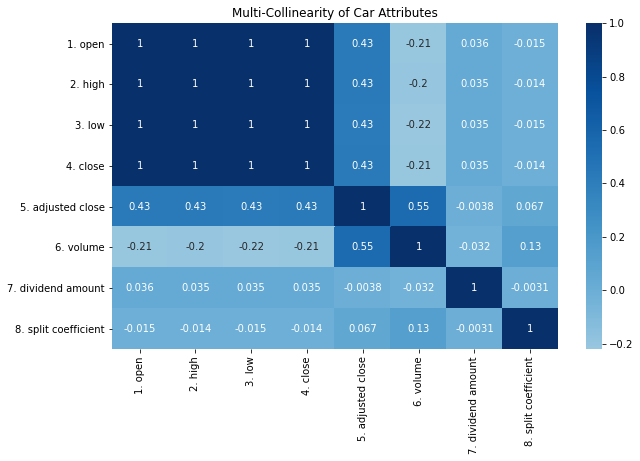

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_dated.corr(), center=0, cmap='Blues' , annot=True)
ax.set_title('Multi-Collinearity of Car Attributes')

In [12]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data,days):
  
  # 1 day window 
#   n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-days)
  
  # return the new dataset 
  return data

In [13]:
df=data_dated.copy()

In [14]:
# calculate the change in price from the previous day
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [15]:
data_dated

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00         123.000000   
2021-03-31   121.65  123.5200  121.1500    122.15         122.150000   
2021-03-30   120.11  120.4031  118.8600    119.90         119.900000   
2021-03-29   121.65  122.5800  120.7299    121.39         121.390000   
2021-03-26   120.35  121.4800  118.9200    121.21         121.210000   
...             ...       ...       ...       ...                ...   
2015-01-08   109.23  112.1500  108.7000    111.89          25.441309   
2015-01-07   107.20  108.2000  106.6950    107.75          24.499965   
2015-01-06   106.54  107.4300  104.6300    106.26          24.161172   
2015-01-05   108.29  108.6500  105.4100    106.25          24.158898   
2015-01-02   111.39  111.4400  107.3500    109.33          24.859222   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
...                 ...                 ...                   ...    ...   
2015-01-08   59364547.0                 0.0                   1.0   AAPL   
2015-01-07   40105934.0                 0.0                   1.0   AAPL   
2015-01-06   65797116.0                 0.0                   1.0   AAPL   
2015-01-05   64285491.0                 0.0                   1.0   AAPL   
2015-01-02   53204626.0                 0.0                   1.0   AAPL   

            change_in_price  
date                         
2021-04-01              NaN  
2021-03-31            -0.85  
2021-03-30            -2.25  
2021-03-29             1.49  
2021-03-26            -0.18  
...                     ...  
2015-01-08            -0.12  
2015-01-07            -4.14  
2015-01-06            -1.49  
2015-01-05            -0.01  
2015-01-02             3.08  

[1573 rows x 10 columns]

In [16]:
# calculating the Relative Strength Index

def calc_RSI(data_dated):
    # Calculate the 14 day RSI
    n = 14

    # First make a copy of the data frame twice
    up_df, down_df = data_dated[['Ticker','change_in_price']].copy(), data_dated[['Ticker','change_in_price']].copy()

    # For up days, if the change is less than 0 set to 0.
    up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

    # For down days, if the change is greater than 0 set to 0.
    down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

    # We need change in price to be absolute.
    down_df['change_in_price'] = down_df['change_in_price'].abs()

    # Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
    ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
    ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

    # Calculate the Relative Strength
    relative_strength = ewma_up / ewma_down

    # Calculate the Relative Strength Index
    relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

    # Add the info to the data frame.
    data_dated['down_days'] = down_df['change_in_price']
    data_dated['up_days'] = up_df['change_in_price']
    data_dated['RSI'] = relative_strength_index

calc_RSI(data_dated)
# Display the head.
data_dated.head(30)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900   123.000            123.000   
2021-03-31   121.65  123.5200  121.1500   122.150            122.150   
2021-03-30   120.11  120.4031  118.8600   119.900            119.900   
2021-03-29   121.65  122.5800  120.7299   121.390            121.390   
2021-03-26   120.35  121.4800  118.9200   121.210            121.210   
2021-03-25   119.54  121.6600  119.0000   120.590            120.590   
2021-03-24   122.82  122.9000  120.0650   120.090            120.090   
2021-03-23   123.33  124.2400  122.1400   122.540            122.540   
2021-03-22   120.33  123.8700  120.2600   123.390            123.390   
2021-03-19   119.90  121.4300  119.6750   119.990            119.990   
2021-03-18   122.88  123.1800  120.3200   120.530            120.530   
2021-03-17   124.05  125.8599  122.3360   124.760            124.760   
2021-03-16   125.70  127.2200  124.7150   125.570            125.570   
2021-03-15   121.41  124.0000  120.4200   123.990            123.990   
2021-03-12   120.40  121.1700  119.1600   121.030            121.030   
2021-03-11   122.54  123.2100  121.2600   121.960            121.960   
2021-03-10   121.69  122.1700  119.4500   119.980            119.980   
2021-03-09   119.03  122.0600  118.7900   121.085            121.085   
2021-03-08   120.93  121.0000  116.2100   116.360            116.360   
2021-03-05   120.98  121.9350  117.5700   121.420            121.420   
2021-03-04   121.75  123.6000  118.6200   120.130            120.130   
2021-03-03   124.81  125.7100  121.8400   122.060            122.060   
2021-03-02   128.41  128.7200  125.0100   125.120            125.120   
2021-03-01   123.75  127.9300  122.7900   127.790            127.790   
2021-02-26   122.59  124.8500  121.2000   121.260            121.260   
2021-02-25   124.68  126.4585  120.5400   120.990            120.990   
2021-02-24   124.94  125.5600  122.2300   125.350            125.350   
2021-02-23   123.76  126.7100  118.3900   125.860            125.860   
2021-02-22   128.01  129.7200  125.6000   126.000            126.000   
2021-02-19   130.24  130.7100  128.8000   129.870            129.870   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   
2021-03-24   88530485.0                 0.0                   1.0   AAPL   
2021-03-23   95467142.0                 0.0                   1.0   AAPL   
2021-03-22  111912284.0                 0.0                   1.0   AAPL   
2021-03-19  185549522.0                 0.0                   1.0   AAPL   
2021-03-18  121469755.0                 0.0                   1.0   AAPL   
2021-03-17  111932636.0                 0.0                   1.0   AAPL   
2021-03-16  115227936.0                 0.0                   1.0   AAPL   
2021-03-15   92590555.0                 0.0                   1.0   AAPL   
2021-03-12   88105050.0                 0.0                   1.0   AAPL   
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0                 0.0                   1.0   AAPL   
2021-03-09  129525780.0                 0.0                   1.0   AAPL   
2021-03-08  154376610.0                 0.0                   1.0   AAPL   
2021-03-05  153766601.0                 0.0                   1.0   AAPL   
2021-03-04  178154975.0            

In [17]:
# Claclulting the Stochastic Oscillator
def stochastic_Oscillator(data_dated):

    # Calculate the Stochastic Oscillator
    n = 14

    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate the Stochastic Oscillator.
    k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

    # Add the info to the data frame.
    data_dated['low_14'] = low_14
    data_dated['high_14'] = high_14
    data_dated['k_percent'] = k_percent


stochastic_Oscillator(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days        RSI  low_14  high_14  \
date                                                                          
2021-04-01              NaN        NaN      NaN        NaN     NaN      NaN   
2021-03-31            -0.85       0.85     0.00   0.000000     NaN      NaN   
2021-03-30            -2.25       2.25     0.00   0.000000     NaN      NaN   
2021-03-29             1.49       0.00     1.49  36.533537     NaN      NaN   
2021-03-26            -0.18       0.18     0.00  34.763240     NaN      NaN   

            k_percent  
date                   
2021-04-01        NaN  
2021-03-31        NaN  
2021-03-30        NaN  
2021-03-29        NaN  
2021-03-26        NaN

In [18]:
# calculating williams R%
def calc_williams_r(data_dated):
# Calculate the Williams %R
    n = 14
    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()
    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())
    # Calculate William %R indicator.
    r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100
    # Add the info to the data frame.
    data_dated['r_percent'] = r_percent


calc_williams_r(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days        RSI  low_14  high_14  \
date                                                                          
2021-04-01              NaN        NaN      NaN        NaN     NaN      NaN   
2021-03-31            -0.85       0.85     0.00   0.000000     NaN      NaN   
2021-03-30            -2.25       2.25     0.00   0.000000     NaN      NaN   
2021-03-29             1.49       0.00     1.49  36.533537     NaN      NaN   
2021-03-26            -0.18       0.18     0.00  34.763240     NaN      NaN   

            k_percent  r_percent  
date                              
2021-04-01        NaN        NaN  
2021-03-31        NaN        NaN  
2021-03-30        NaN        NaN  
2021-03-29        NaN        NaN  
2021-03-26        NaN        NaN

In [19]:
# calculating the Moving Average Convergence Divergnece (MACD)
def calc_macd(data_dated):
    # Calculate the MACD
    ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
    ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
    macd = ema_12 - ema_26

    # Calculate the EMA
    ema_9_macd = macd.ewm(span = 9).mean()

    # Store the data in the data frame.
    data_dated['MACD'] = macd
    data_dated['MACD_EMA'] = ema_9_macd
    

calc_macd(data_dated)   
# Print the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days        RSI  low_14  high_14  \
date                                                                          
2021-04-01              NaN        NaN      NaN        NaN     NaN      NaN   
2021-03-31            -0.85       0.85     0.00   0.000000     NaN      NaN   
2021-03-30            -2.25       2.25     0.00   0.000000     NaN      NaN   
2021-03-29             1.49       0.00     1.49  36.533537     NaN      NaN   
2021-03-26            -0.18       0.18     0.00  34.763240     NaN      NaN   

            k_percent  r_percent      MACD  MACD_EMA  
date                                                  
2021-04-01        NaN        NaN  0.000000  0.000000  
2021-03-31        NaN        NaN -0.019071 -0.010595  
2021-03-30        NaN        NaN -0.094072 -0.044807  
2021-03-29        NaN        NaN -0.072083 -0.054047  
2021-03-26        NaN        NaN -0.065779 -0.057537

In [20]:
# calculating the price rate of change 
def calc_price_rate_of_change(data_dated):
    # Calculate the Price Rate of Change
    n = 9

    # Calculate the Rate of Change in the Price, and store it in the Data Frame.
    data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

calc_price_rate_of_change(data_dated)
# Print the first 30 rows
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days        RSI  low_14  high_14  \
date                                                                          
2021-04-01              NaN        NaN      NaN        NaN     NaN      NaN   
2021-03-31            -0.85       0.85     0.00   0.000000     NaN      NaN   
2021-03-30            -2.25       2.25     0.00   0.000000     NaN      NaN   
2021-03-29             1.49       0.00     1.49  36.533537     NaN      NaN   
2021-03-26            -0.18       0.18     0.00  34.763240     NaN      NaN   

            k_percent  r_percent      MACD  MACD_EMA  Price_Rate_Of_Change  
date                                                                        
2021-04-01        NaN        NaN  0.000000  0.000000                   NaN  
2021-03-31        NaN        NaN -0.019071 -0.010595                   NaN  
2021-03-30        NaN        NaN -0.094072 -0.044807                   NaN  
2021-03-29        NaN        NaN -0.072083 -0.054047                   NaN  
2021-03-26        NaN        NaN -0.065779 -0.057537                   NaN

In [21]:
data_dated = trading_window(data_dated,10)

In [22]:
data_dated = data_dated[:-1]

In [23]:
data_dated.reset_index(inplace = True) 

In [24]:
data_dated.drop(['Ticker','2. high','3. low', '1. open', '5. adjusted close', '7. dividend amount', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True) 

/Users/aesthetic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_lstm=data_dated.copy()
df_RandomForest=data_dated.copy()
copy_df=data_dated.copy()

In [26]:
data_dated.head(10)

date  4. close  change_in_price  down_days  up_days        RSI  \
0 2021-04-01    123.00              NaN        NaN      NaN        NaN   
1 2021-03-31    122.15            -0.85       0.85     0.00   0.000000   
2 2021-03-30    119.90            -2.25       2.25     0.00   0.000000   
3 2021-03-29    121.39             1.49       0.00     1.49  36.533537   
4 2021-03-26    121.21            -0.18       0.18     0.00  34.763240   
5 2021-03-25    120.59            -0.62       0.62     0.00  29.149497   
6 2021-03-24    120.09            -0.50       0.50     0.00  25.341544   
7 2021-03-23    122.54             2.45       0.00     2.45  57.058089   
8 2021-03-22    123.39             0.85       0.00     0.85  63.299461   
9 2021-03-19    119.99            -3.40       3.40     0.00  37.885246   

   k_percent  r_percent      MACD  Price_Rate_Of_Change   Target  
0        NaN        NaN  0.000000                   NaN  120.530  
1        NaN        NaN -0.019071                   NaN  124.760  
2        NaN        NaN -0.094072                   NaN  125.570  
3        NaN        NaN -0.072083                   NaN  123.990  
4        NaN        NaN -0.065779                   NaN  121.030  
5        NaN        NaN -0.087265                   NaN  121.960  
6        NaN        NaN -0.122192                   NaN  119.980  
7        NaN        NaN -0.027125                   NaN  121.085  
8        NaN        NaN  0.081291                   NaN  116.360  
9        NaN        NaN -0.018116             -0.024472  121.420

In [27]:
# Any row that has a `NaN` value will be dropped.
data_dated = data_dated.dropna()

In [28]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
sc = MinMaxScaler(feature_range = (0, 1))

In [29]:
X = data_dated.iloc[:, :-1]
y = data_dated.iloc[:, -1]

In [30]:
cv.split(X)

<generator object _BaseKFold.split at 0x7fe2dc3903c0>

In [31]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas

In [32]:
df_lstm=df_lstm.reset_index()

In [33]:

# regression_model = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
regression_model = Ridge()

 
Accuracy for Split 1
0.3003456591424869
MSE: 0.05681923190890594
RMSE: 0.23836784999010655
Rsquared 0.3003456591424869
MAE: 0.09595173603043052
 
 
Accuracy for Split 2
0.7841780479327067
MSE: 0.008990644224820533
RMSE: 0.09481900771902506
Rsquared 0.7841780479327067
MAE: 0.07187546885394631
 
 
Accuracy for Split 3
0.9187848150266996
MSE: 0.005618245591634611
RMSE: 0.0749549570851362
Rsquared 0.9187848150266996
MAE: 0.05980569345411612
 
 
Accuracy for Split 4
0.7138754558465517
MSE: 0.01799095528118973
RMSE: 0.13413036673769937
Rsquared 0.7138754558465517
MAE: 0.11048054606966311
 
 
Accuracy for Split 5
0.7995704279908917
MSE: 0.014994633896912345
RMSE: 0.12245257815543266
Rsquared 0.7995704279908917
MAE: 0.09336188170495158
 
 
Accuracy for Split 6
0.3587987500672365
MSE: 0.04328384543397947
RMSE: 0.2080476999007186
Rsquared 0.3587987500672365
MAE: 0.1599238174215731
 
 
Accuracy for Split 7
0.880838725154264
MSE: 0.0104306047855646
RMSE: 0.10213033234825294
Rsquared 0.8808387251

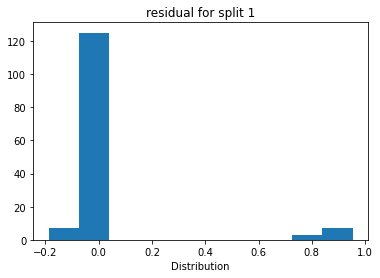

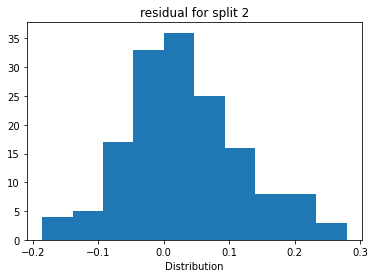

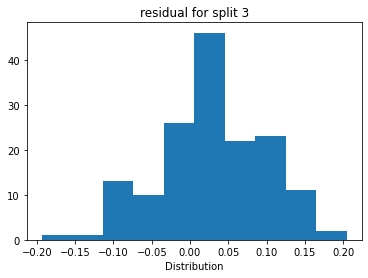

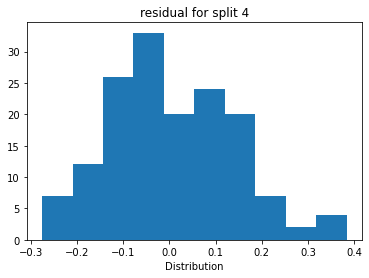

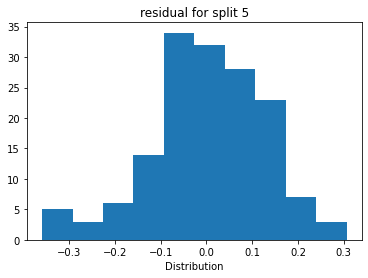

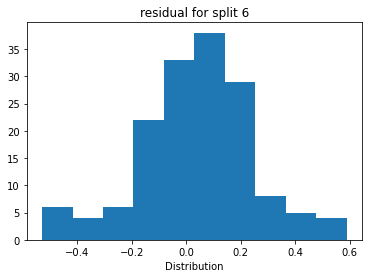

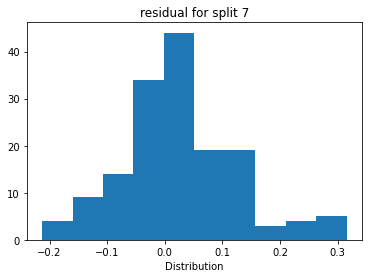

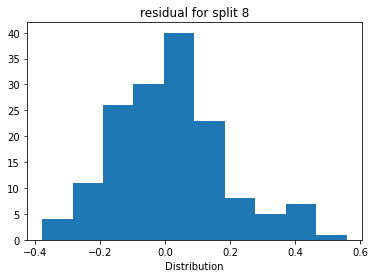

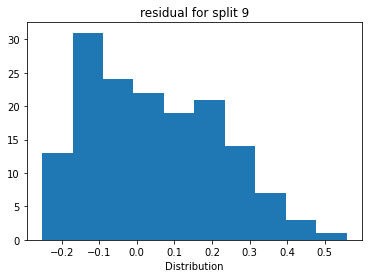

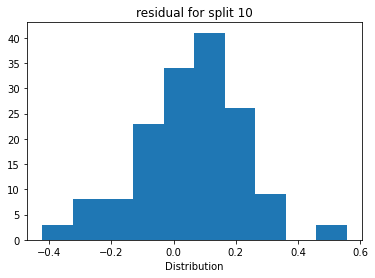

In [34]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=1


for train_index, test_index in cv.split(X):
    X_train, X_test =X.reindex(train_index), X.reindex(test_index)
    y_train, y_test = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    y_train = y_train.dropna()
    X_train = X_train.dropna()
    y_test = y_test.dropna()
    X_test = X_test.dropna()
    
    

    X_train= sc.fit_transform(X_train.iloc[:, 1:])  
    X_test= sc.fit_transform(X_test.iloc[:, 1:])  
    y_train=sc.fit_transform(y_train.values.reshape(-1,1)) 
    y_test= sc.fit_transform(y_test.values.reshape(-1, 1)) 

    
    regression_model.fit(X_train, y_train)
    print(" ")
    print('Accuracy for Split '+ str(p))
    print(regression_model.score(X_test, y_test))
    accuracy_scores.append(regression_model.score(X_test, y_test))

    pred = regression_model.predict(X_test)
    residual= y_test-pred
   
    fig, ax = plt.subplots()
    ax.hist( residual)
    print('MSE: ' +str(mean_squared_error(y_test, pred)))
    mse.append(mean_squared_error(y_test, pred))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test, pred))))
    rmse.append(math.sqrt(mean_squared_error(y_test, pred)))
    print('Rsquared '+ str(r2_score(y_test, pred)))
    rsquared.append(r2_score(y_test, pred))
    print('MAE: ' + str(mean_absolute_error(y_test, pred)))
    mae.append(mean_absolute_error(y_test, pred))
    print(" ")
 
    ax.set_title('residual for split ' + str(p))
    ax.set_xlabel("Distribution")
    p +=1
    
    
    
    
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))

mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))

    


In [35]:
X

date  4. close  change_in_price  down_days  up_days        RSI  \
13   2021-03-15   123.990           -1.580       1.58    0.000  57.050824   
14   2021-03-12   121.030           -2.960       2.96    0.000  43.136621   
15   2021-03-11   121.960            0.930       0.00    0.930  47.755887   
16   2021-03-10   119.980           -1.980       1.98    0.000  39.811217   
17   2021-03-09   121.085            1.105       0.00    1.105  45.635098   
...         ...       ...              ...        ...      ...        ...   
1558 2015-01-23   112.980           -0.120       0.12    0.000  33.089546   
1559 2015-01-22   112.400           -0.580       0.58    0.000  31.730474   
1560 2015-01-21   109.550           -2.850       2.85    0.000  25.737048   
1561 2015-01-20   108.720           -0.830       0.83    0.000  24.200973   
1562 2015-01-16   105.990           -2.730       2.73    0.000  19.731583   

      k_percent  r_percent      MACD  Price_Rate_Of_Change  
13    61.363636 -38.636364  0.383381              0.022935  
14    25.956938 -74.043062  0.239760              0.003649  
15    37.081340 -62.918660  0.184172              0.015572  
16    12.771084 -87.228916  0.016962             -0.020891  
17    27.224199 -72.775801 -0.041632             -0.018681  
...         ...        ...       ...                   ...  
1558  24.858402 -75.141598 -3.685487             -0.058029  
1559  25.685976 -74.314024 -3.766525             -0.059886  
1560  10.457516 -89.542484 -4.014442             -0.076696  
1561  15.845824 -84.154176 -4.229142             -0.083537  
1562   5.160026 -94.839974 -4.566937             -0.095340  

[1550 rows x 10 columns]

# Random Forest Model

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data


In [37]:
df_RandomForest=df_RandomForest.drop(['date'], axis = 1) 

In [38]:
X_RandomForest = X
y_RandomForest = y

In [39]:
X_RandomForest.head(10)

date  4. close  change_in_price  down_days  up_days        RSI  \
13 2021-03-15   123.990           -1.580      1.580    0.000  57.050824   
14 2021-03-12   121.030           -2.960      2.960    0.000  43.136621   
15 2021-03-11   121.960            0.930      0.000    0.930  47.755887   
16 2021-03-10   119.980           -1.980      1.980    0.000  39.811217   
17 2021-03-09   121.085            1.105      0.000    1.105  45.635098   
18 2021-03-08   116.360           -4.725      4.725    0.000  30.888744   
19 2021-03-05   121.420            5.060      0.000    5.060  50.609570   
20 2021-03-04   120.130           -1.290      1.290    0.000  46.690426   
21 2021-03-03   122.060            1.930      0.000    1.930  52.976622   
22 2021-03-02   125.120            3.060      0.000    3.060  61.320621   

    k_percent  r_percent      MACD  Price_Rate_Of_Change  
13  61.363636 -38.636364  0.383381              0.022935  
14  25.956938 -74.043062  0.239760              0.003649  
15  37.081340 -62.918660  0.184172              0.015572  
16  12.771084 -87.228916  0.016962             -0.020891  
17  27.224199 -72.775801 -0.041632             -0.018681  
18   1.362398 -98.637602 -0.389259             -0.030253  
19  47.320618 -52.679382 -0.322662              0.007384  
20  35.603996 -64.396004 -0.352685             -0.037111  
21  53.133515 -46.866485 -0.242269             -0.027953  
22  71.223022 -28.776978  0.054125              0.009114

 
Accuracy for Split 0:
0.2797279197210292
MSE: 0.058493607452963024
RMSE: 0.24185451712333805
Rsquaed: 0.2797279197210292
MAE: 0.08029367960676911
 
 
Accuracy for Split 1:
0.5776497576959585
MSE: 0.01759413595535646
RMSE: 0.13264288882317235
Rsquaed: 0.5776497576959585
MAE: 0.10028648877658343
 
 
Accuracy for Split 2:
0.5839767434838588
MSE: 0.028779357305012406
RMSE: 0.16964479745931618
Rsquaed: 0.5839767434838588
MAE: 0.11310474259459963
 
 
Accuracy for Split 3:
0.21876722252048475
MSE: 0.049122398798111706
RMSE: 0.2216357344791487
Rsquaed: 0.21876722252048475
MAE: 0.16361897788511323
 
 
Accuracy for Split 4:
0.1893972253521078
MSE: 0.060643206088940464
RMSE: 0.24625841323483846
Rsquaed: 0.1893972253521078
MAE: 0.17696372247090855
 
 
Accuracy for Split 5:
0.031787333689266006
MSE: 0.06535852417662852
RMSE: 0.2556531325382666
Rsquaed: 0.031787333689266006
MAE: 0.1834388359965208
 
 
Accuracy for Split 6:
0.256468353544438
MSE: 0.0650839356978869
RMSE: 0.2551155340191712
Rsquaed:

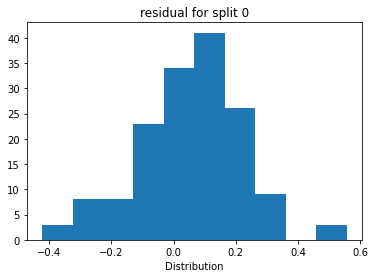

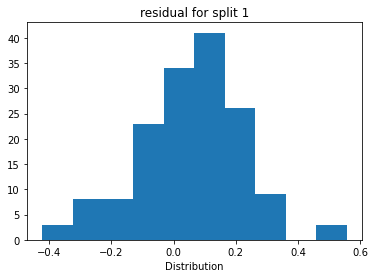

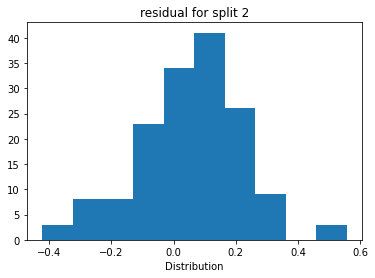

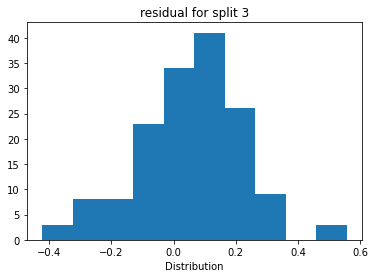

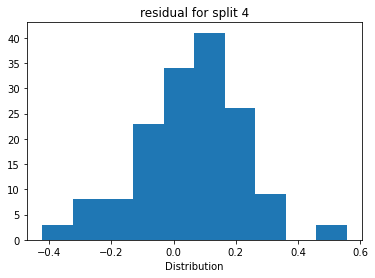

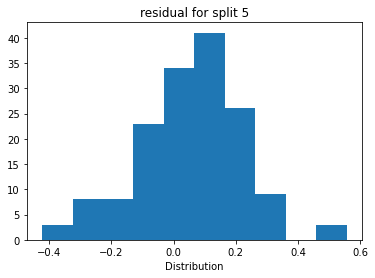

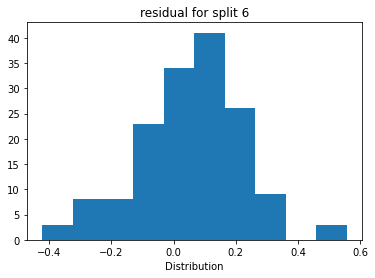

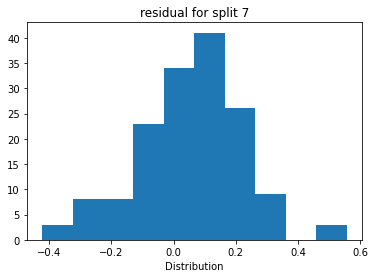

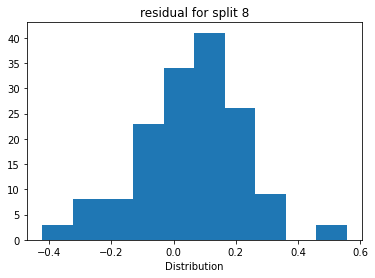

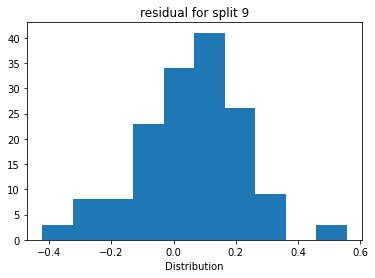

In [40]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=0

for train_index, test_index in cv.split(X):
    
    X_train_RandomForest, X_test_RandomForest =X_RandomForest.reindex(train_index), X_RandomForest.reindex(test_index)
    y_train_RandomForest, y_test_RandomForest = y_RandomForest.reindex(train_index), y_RandomForest.reindex(test_index).reset_index(drop=True)

    
    X_train_RandomForest = X_train_RandomForest.dropna()
    X_test_RandomForest = X_test_RandomForest.dropna()
    y_train_RandomForest = y_train_RandomForest.dropna()
    y_test_RandomForest = y_test_RandomForest.dropna()
    
    X_train_RandomForest= sc.fit_transform(X_train_RandomForest.iloc[:, 1:])  
    X_test_RandomForest= sc.fit_transform(X_test_RandomForest.iloc[:, 1:])  
    y_train_RandomForest=sc.fit_transform(y_train_RandomForest.values.reshape(-1,1)) 
    y_test_RandomForest= sc.fit_transform(y_test_RandomForest.values.reshape(-1, 1))  
    
    
    
    rf.fit(X_train_RandomForest, y_train_RandomForest.ravel())
    
    pred_rf = rf.predict(X_test_RandomForest)
    residual_rf= y_test_RandomForest-pred_rf
    fig, ax = plt.subplots()
    ax.hist( residual)
    print(" ")
    print('Accuracy for Split '+ str(p) + ':')
    # View accuracy score
    print(rf.score(X_test_RandomForest, y_test_RandomForest))
#     # Use the forest's predict method on the test data
    
    print('MSE: ' +str(mean_squared_error(y_test_RandomForest, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y_test_RandomForest, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y_test_RandomForest, pred_rf)))
    print(" ")
    ax.set_xlabel("Distribution")
    ax.set_title('residual for split ' + str(p))
    
    p+=1
   
    accuracy_scores.append(rf.score(X_test_RandomForest, y_test_RandomForest))
    mse.append(mean_squared_error(y_test_RandomForest, pred_rf))
    rmse.append(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf)))
    rsquared.append(r2_score(y_test_RandomForest, pred_rf))
    mae.append(mean_absolute_error(y_test_RandomForest, pred_rf))
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))






    
   
 

In [41]:
feature_list = list(X.iloc[:, 1:].columns)

importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: 4. close             Importance: 0.85
Variable: Price_Rate_Of_Change Importance: 0.05
Variable: change_in_price      Importance: 0.02
Variable: up_days              Importance: 0.02
Variable: RSI                  Importance: 0.01
Variable: k_percent            Importance: 0.01
Variable: r_percent            Importance: 0.01
Variable: MACD                 Importance: 0.01
Variable: down_days            Importance: 0.0


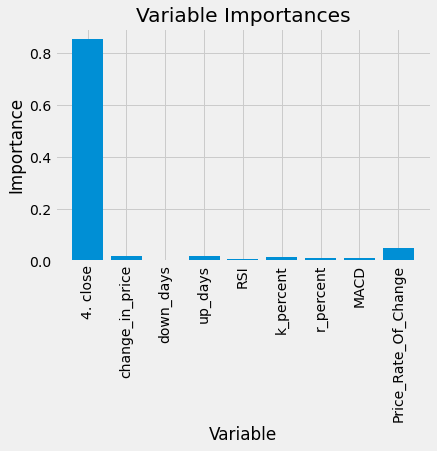

In [42]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# LSTM

In [43]:
X_lstm= X
y_lstm = y

X_lstm.drop(['date'], axis = 1, inplace=True) 
# y_lstm.drop(['date'], axis = 1, inplace=True) 

In [44]:
X_lstm.head(10)

4. close  change_in_price  down_days  up_days        RSI  k_percent  \
13   123.990           -1.580      1.580    0.000  57.050824  61.363636   
14   121.030           -2.960      2.960    0.000  43.136621  25.956938   
15   121.960            0.930      0.000    0.930  47.755887  37.081340   
16   119.980           -1.980      1.980    0.000  39.811217  12.771084   
17   121.085            1.105      0.000    1.105  45.635098  27.224199   
18   116.360           -4.725      4.725    0.000  30.888744   1.362398   
19   121.420            5.060      0.000    5.060  50.609570  47.320618   
20   120.130           -1.290      1.290    0.000  46.690426  35.603996   
21   122.060            1.930      0.000    1.930  52.976622  53.133515   
22   125.120            3.060      0.000    3.060  61.320621  71.223022   

    r_percent      MACD  Price_Rate_Of_Change  
13 -38.636364  0.383381              0.022935  
14 -74.043062  0.239760              0.003649  
15 -62.918660  0.184172              0.015572  
16 -87.228916  0.016962             -0.020891  
17 -72.775801 -0.041632             -0.018681  
18 -98.637602 -0.389259             -0.030253  
19 -52.679382 -0.322662              0.007384  
20 -64.396004 -0.352685             -0.037111  
21 -46.866485 -0.242269             -0.027953  
22 -28.776978  0.054125              0.009114

In [45]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot


accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

for train_index, test_index in cv.split(X_lstm):
    X_train_lstm, X_test_lstm =X_lstm.reindex(train_index), X_lstm.reindex(test_index)
    y_train_lstm, y_test_lstm = y_lstm.reindex(train_index), y_lstm.reindex(test_index).reset_index(drop=True)
    
    
    
    X_train_lstm = X_train_lstm.dropna()
    X_test_lstm = X_test_lstm.dropna()
    y_train_lstm = y_train_lstm.dropna()
    y_test_lstm = y_test_lstm.dropna()
    
    X_train_lstm= sc.fit_transform(X_train_lstm.iloc[:, 1:])  
    X_test_lstm= sc.fit_transform(X_test_lstm.iloc[:, 1:])  
    y_train_lstm=sc.fit_transform(y_train_lstm.values.reshape(-1,1)) 
    y_test_lstm= sc.fit_transform(y_test_lstm.values.reshape(-1, 1))  
    
    
    
    X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
    
    inputs = keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    x = keras.layers.LSTM(300, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['accuracy','mean_squared_error', 'mae', 'mape'])
    model.summary()
    
    histoty=model.fit(
    X_train_lstm, y_train_lstm,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2)
    
    scores = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accuracy_scores.append(scores[1])
    print("MSE:" + str((scores[2])))
    mse.append(scores[2])
    print("MAE:" + str((scores[3])))
    mae.append(scores[3])
    print('RMSE: ' + str(math.sqrt(scores[2])))
    
    y_pred = model.predict(X_test_lstm)
    
    print('R2 Score: ', r2_score(y_test_lstm, y_pred))
    rsquared.append(r2_score(y_test_lstm, y_pred))
    

#     pyplot.plot(history.history['loss'])
#     pyplot.plot(history.history['val_loss'])
#     pyplot.title('model train vs validation loss')
#     pyplot.ylabel('loss')
#     pyplot.xlabel('epoch')
#     pyplot.legend(['train', 'validation'], loc='upper right')
#     pyplot.show()
    
    


mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))



rsquared_avg= np.mean(rsquared)
print('Average Accuracy ='+ str(rsquared_avg))

# rmse_avg= np.mean(rmse)
# print('Average RMSE ='+ str(scores[1]))

# rsquared_avg= np.mean(rsquared)
# print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))
    
#     print('MSE =' + str(history.history['mean_squared_error']))
    # Trai the model
#      y_train_rf, y_test_rf = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    
#     y_train_rf = y_train_rf.dropna()
#     X_train_rf = X_train_rf.dropna()
#     y_test_rf = y_test_rf.dropna()
#     X_test_rf = X_test_rf.dropna()
#     rf.fit(X_train_rf.iloc[:, 1:], y_train_rf)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 8, 300)            362400    
_________________________________________________________________
dropout (Dropout)            (None, 8, 300)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 300)            721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 300)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 1)                 301   

35/35 [==============================] - 9s 135ms/step - loss: 0.0302 - accuracy: 8.0257e-04 - mean_squared_error: 0.0302 - mae: 0.1215 - mape: 173467.7263 - val_loss: 0.0252 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0252 - val_mae: 0.1560 - val_mape: 377.5080
Epoch 2/20
35/35 [==============================] - 4s 122ms/step - loss: 0.0204 - accuracy: 3.4737e-04 - mean_squared_error: 0.0204 - mae: 0.0997 - mape: 59462.2937 - val_loss: 0.0276 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0276 - val_mae: 0.1635 - val_mape: 394.3491
Epoch 3/20
35/35 [==============================] - 5s 158ms/step - loss: 0.0191 - accuracy: 8.6458e-04 - mean_squared_error: 0.0191 - mae: 0.0986 - mape: 171918.3881 - val_loss: 0.0188 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0188 - val_mae: 0.1340 - val_mape: 329.4861
Epoch 4/20
35/35 [==============================] - 5s 154ms/step - loss: 0.0202 - accuracy: 2.4711e-04 - mean_squared_error: 0.0202 - mae: 0.0987 - mape: 49

Epoch 5/20
35/35 [==============================] - 4s 119ms/step - loss: 0.0324 - accuracy: 0.0018 - mean_squared_error: 0.0324 - mae: 0.1306 - mape: 506478.4733 - val_loss: 0.0263 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0263 - val_mae: 0.1592 - val_mape: 384.1353
Epoch 6/20
35/35 [==============================] - 5s 131ms/step - loss: 0.0318 - accuracy: 0.0015 - mean_squared_error: 0.0318 - mae: 0.1289 - mape: 374293.8098 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0203 - val_mae: 0.1397 - val_mape: 343.3691
Epoch 7/20
35/35 [==============================] - 4s 111ms/step - loss: 0.0324 - accuracy: 1.0211e-04 - mean_squared_error: 0.0324 - mae: 0.1327 - mape: 27556.1163 - val_loss: 0.0277 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0277 - val_mae: 0.1609 - val_mape: 374.2631
Epoch 8/20
35/35 [==============================] - 5s 140ms/step - loss: 0.0341 - accuracy: 3.4737e-04 - mean_squared_error: 0.0341 - mae: 0.1309 - mape:

Epoch 9/20
35/35 [==============================] - 4s 108ms/step - loss: 0.0340 - accuracy: 8.6458e-04 - mean_squared_error: 0.0340 - mae: 0.1419 - mape: 236790.2071 - val_loss: 0.0079 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0079 - val_mae: 0.0817 - val_mape: 241.8537
Epoch 10/20
35/35 [==============================] - 4s 104ms/step - loss: 0.0334 - accuracy: 0.0011 - mean_squared_error: 0.0334 - mae: 0.1358 - mape: 251984.9310 - val_loss: 0.0376 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0376 - val_mae: 0.1915 - val_mape: 458.6168
Epoch 11/20
35/35 [==============================] - 4s 109ms/step - loss: 0.0339 - accuracy: 4.2128e-04 - mean_squared_error: 0.0339 - mae: 0.1421 - mape: 131658.8999 - val_loss: 0.0338 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0338 - val_mae: 0.1821 - val_mape: 451.6086
Epoch 12/20
35/35 [==============================] - 4s 104ms/step - loss: 0.0344 - accuracy: 5.0207e-04 - mean_squared_error: 0.0344 - mae: 0.1422

Epoch 13/20
35/35 [==============================] - 4s 101ms/step - loss: 0.0362 - accuracy: 4.6074e-04 - mean_squared_error: 0.0362 - mae: 0.1486 - mape: 112822.6621 - val_loss: 0.0246 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0246 - val_mae: 0.1531 - val_mape: 369.6277
Epoch 14/20
35/35 [==============================] - 4s 108ms/step - loss: 0.0331 - accuracy: 0.0015 - mean_squared_error: 0.0331 - mae: 0.1357 - mape: 303352.3796 - val_loss: 0.0370 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0370 - val_mae: 0.1908 - val_mape: 464.5154
Epoch 15/20
35/35 [==============================] - 4s 101ms/step - loss: 0.0380 - accuracy: 0.0011 - mean_squared_error: 0.0380 - mae: 0.1515 - mape: 236210.7647 - val_loss: 0.0307 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0307 - val_mae: 0.1725 - val_mape: 434.7625
Epoch 16/20
35/35 [==============================] - 4s 102ms/step - loss: 0.0294 - accuracy: 1.2924e-04 - mean_squared_error: 0.0294 - mae: 0.1308 - 

Epoch 17/20
35/35 [==============================] - 5s 136ms/step - loss: 0.0371 - accuracy: 0.0010 - mean_squared_error: 0.0371 - mae: 0.1533 - mape: 239118.5128 - val_loss: 0.0289 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0289 - val_mae: 0.1681 - val_mape: 411.7903
Epoch 18/20
35/35 [==============================] - 4s 125ms/step - loss: 0.0315 - accuracy: 4.6074e-04 - mean_squared_error: 0.0315 - mae: 0.1367 - mape: 92336.9324 - val_loss: 0.0118 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0118 - val_mae: 0.1026 - val_mape: 287.2925
Epoch 19/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0333 - accuracy: 8.6458e-04 - mean_squared_error: 0.0333 - mae: 0.1412 - mape: 215530.4302 - val_loss: 0.0454 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0454 - val_mae: 0.2111 - val_mape: 504.3709
Epoch 20/20
35/35 [==============================] - 4s 106ms/step - loss: 0.0345 - accuracy: 3.1265e-04 - mean_squared_error: 0.0345 - mae: 0.1443

accuracy: 0.65%
MSE:0.09396786242723465
MAE:0.22919327020645142
RMSE: 0.30654177925241227
R2 Score:  -0.07350732918771641
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 8, 1)]            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 8, 300)            362400    
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 300)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 8, 300)            721200    
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 300)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 300)               721200    
___

35/35 [==============================] - 9s 129ms/step - loss: 0.0458 - accuracy: 0.0000e+00 - mean_squared_error: 0.0458 - mae: 0.1577 - mape: 84.7611 - val_loss: 0.0532 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0532 - val_mae: 0.2278 - val_mape: 1139907.0000
Epoch 2/20
35/35 [==============================] - 4s 107ms/step - loss: 0.0307 - accuracy: 0.0000e+00 - mean_squared_error: 0.0307 - mae: 0.1264 - mape: 75.6235 - val_loss: 0.0431 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0431 - val_mae: 0.2050 - val_mape: 1038075.6250
Epoch 3/20
35/35 [==============================] - 4s 126ms/step - loss: 0.0292 - accuracy: 0.0000e+00 - mean_squared_error: 0.0292 - mae: 0.1273 - mape: 78.6358 - val_loss: 0.0444 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0444 - val_mae: 0.2078 - val_mape: 1057359.6250
Epoch 4/20
35/35 [==============================] - 4s 108ms/step - loss: 0.0311 - accuracy: 0.0000e+00 - mean_squared_error: 0.0311 - mae: 0.1316 - mape: 80.9963 - val

35/35 [==============================] - 5s 142ms/step - loss: 0.0328 - accuracy: 0.0000e+00 - mean_squared_error: 0.0328 - mae: 0.1273 - mape: 75.7119 - val_loss: 0.0803 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0803 - val_mae: 0.2814 - val_mape: 1265981.6250
Epoch 6/20
35/35 [==============================] - 6s 161ms/step - loss: 0.0300 - accuracy: 0.0000e+00 - mean_squared_error: 0.0300 - mae: 0.1355 - mape: 88.1877 - val_loss: 0.0352 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0352 - val_mae: 0.1862 - val_mape: 883996.3750
Epoch 7/20
35/35 [==============================] - 5s 139ms/step - loss: 0.0304 - accuracy: 0.0000e+00 - mean_squared_error: 0.0304 - mae: 0.1305 - mape: 79.8953 - val_loss: 0.0491 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0491 - val_mae: 0.2168 - val_mape: 1078928.1250
Epoch 8/20
35/35 [==============================] - 5s 133ms/step - loss: 0.0298 - accuracy: 0.0000e+00 - mean_squared_error: 0.0298 - mae: 0.1294 - mape: 83.2089 - val_

In [46]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

In [47]:
starting_date='2015-01-01'
pd.options.mode.chained_assignment = None  # default='warn'

def pricePrediction_LR(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(sym,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_madcd(stock_df)
    calc_price_rate_of_change(stock_df)
    
#     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
# #     remove the last column of the data as it will be null
#     stock_df_targeted= stock_df_targeted[:-1]

    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
    stock_df_targeted_scaled.head(10)
    stock_df_targeted_scaled.drop(['Ticker','1. open','2. high','3. low', '5. adjusted close', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
    # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
    
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    regression_model = Ridge()
    regression_model.fit(X_train, y_train)
    
    lr_accuracy = regression_model.score(X_test, y_test)
    predicted_prices = regression_model.predict(X)
    
    
    print("Linear Regression Score: ", lr_accuracy)
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, predicted_prices))))
    print('Rsquared '+ str(r2_score(y, predicted_prices)))
    print('MAE: ' + str(mean_absolute_error(y, predicted_prices)))
    

    
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
    
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction")
    
    

Linear Regression Score:  0.7923729869944766
RMSE: 0.025781226679314758
Rsquared 0.9779790024232522
MAE: 0.010597392594406913


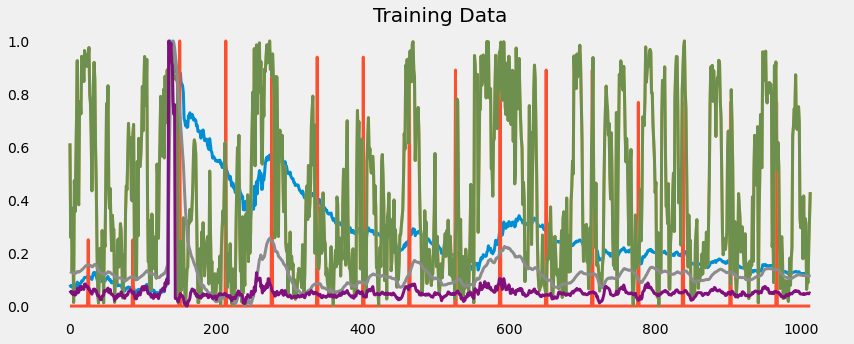

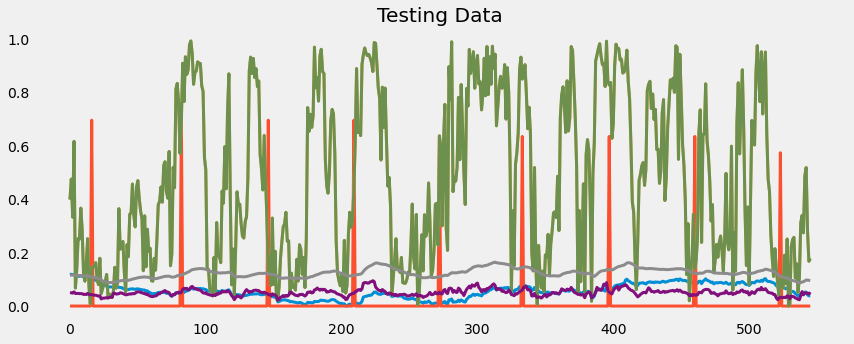

In [48]:
pricePrediction_LR('VOO', 1,starting_date )

In [49]:
def pricePrediction_RandomForest(symbol,days, starting_date):
    p=0
    mse=[]
    rmse=[]
    rsquared=[]
    mae=[]
    
    #     obtain stock data
    stock_df= stock_data(sym,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_madcd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
#     stock_df_targeted_scaled.head(10)
    stock_df_targeted_scaled.drop(['Ticker','2. high','3. low', '5. adjusted close','7. dividend amount' ,'6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
#     # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
     
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train, y_train.ravel()) 
    pred_rf = rf.predict(X)
  
    print('MSE: ' +str(mean_squared_error(y, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y, pred_rf)))
    print('')
    
    
    Predicted = []
    for i in pred_rf:
        Predicted.append(i)
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        

    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction for " )
   
    

MSE: 0.00023525201994494143
RMSE: 0.01533792749835979
Rsquaed: 0.9922059498577628
MAE: 0.0054851055887082415



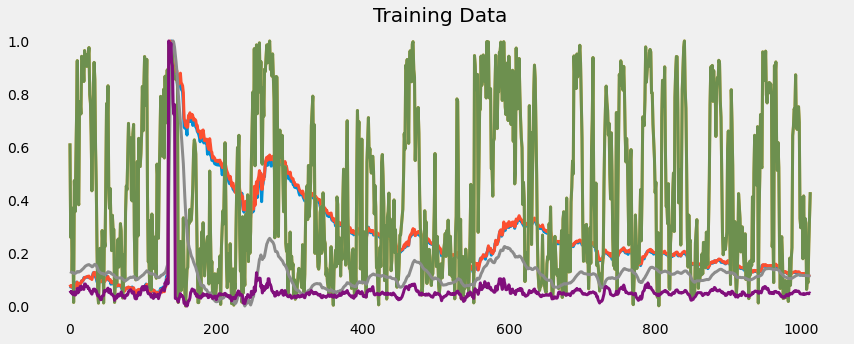

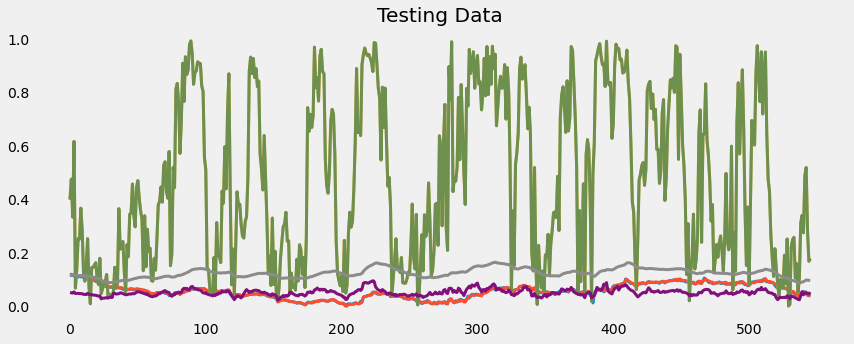

In [50]:
pricePrediction_RandomForest('VOO', 1,starting_date )

MSE: 0.000334182264615645
RMSE: 0.01828065274041507
Rsquaed: 0.9889283274691103
MAE: 0.006361224352042743



MSE: 0.031166180659316523
RMSE: 0.17653945921327766
Rsquaed: -0.029443655510529076
MAE: 0.06003470517611004



MSE: 0.10817741631616563
RMSE: 0.3289033540664577
Rsquaed: -2.541304982420914
MAE: 0.15486317545781897



MSE: 0.09431069981777593
RMSE: 0.3071004718618581
Rsquaed: -2.0448400257360895
MAE: 0.1598674933667188



MSE: 0.06860930113612887
RMSE: 0.2619337724237348
Rsquaed: -1.1943357820475873
MAE: 0.14637598913299052



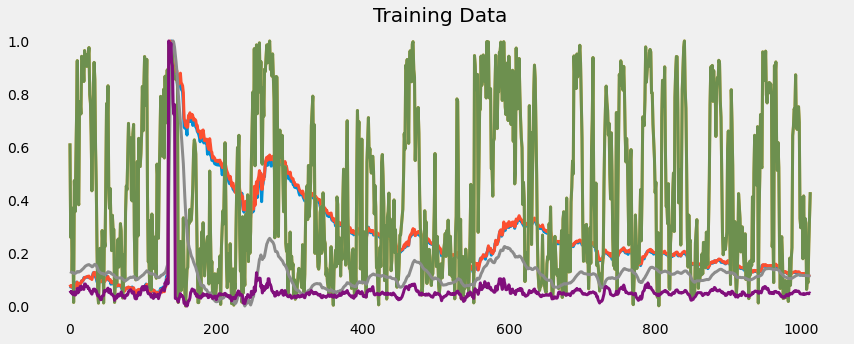

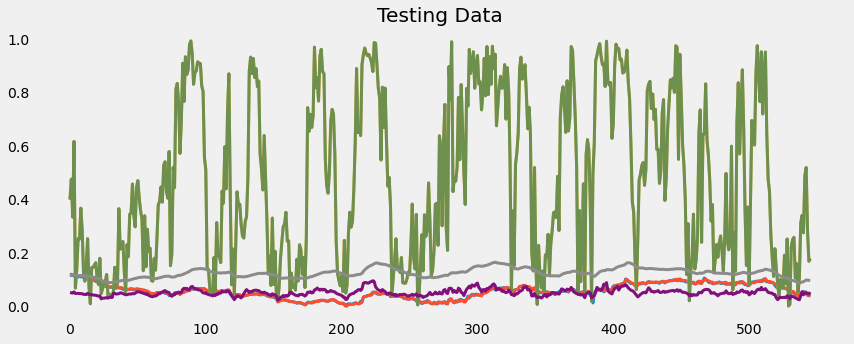

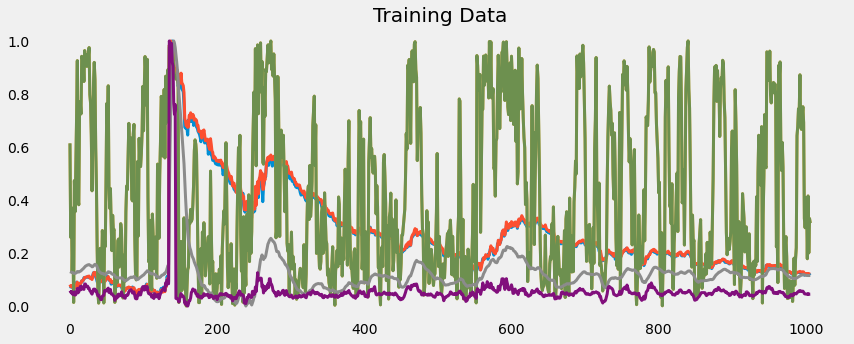

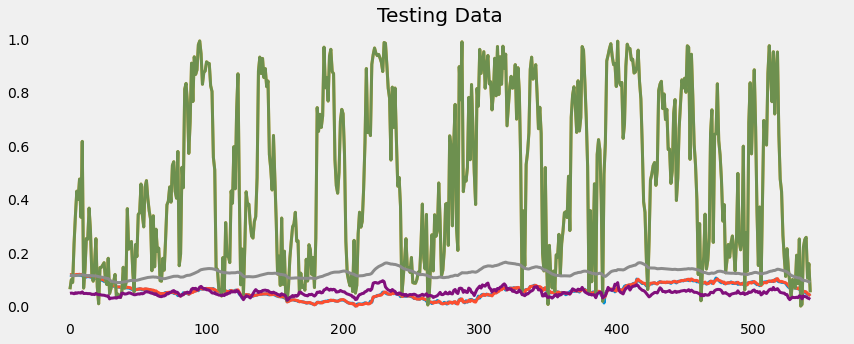

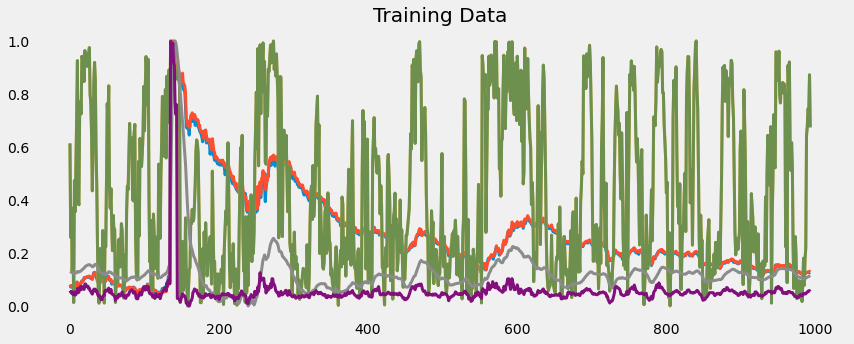

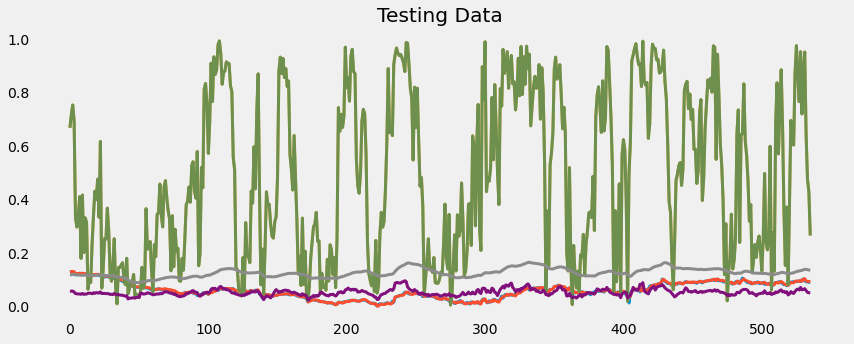

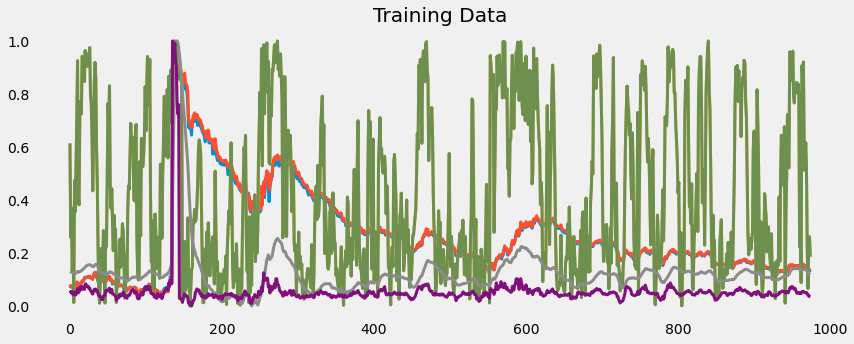

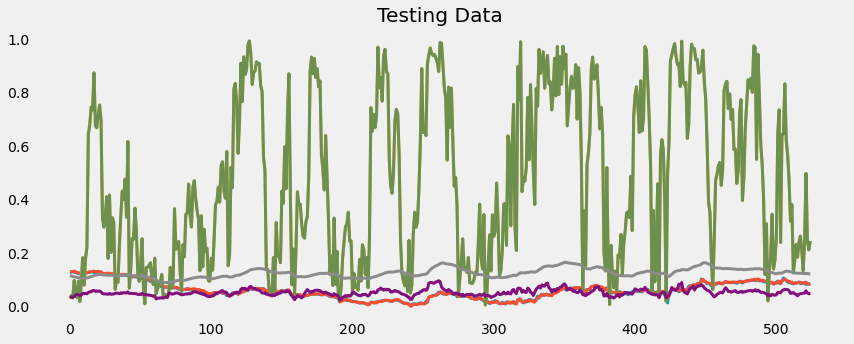

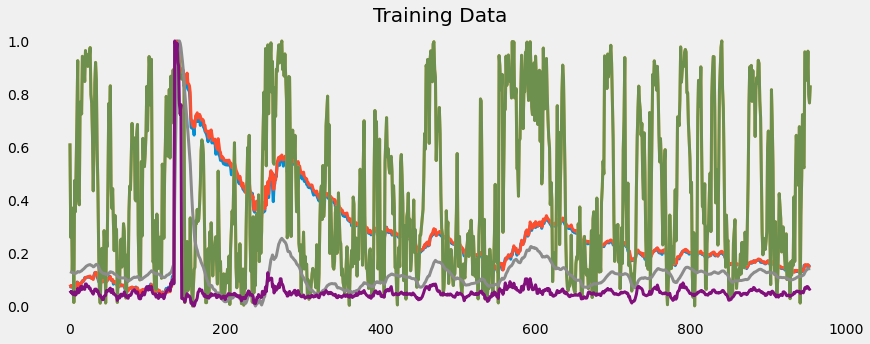

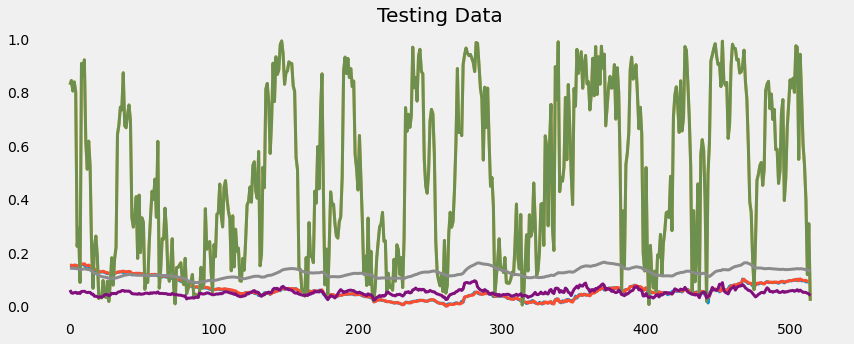

In [51]:
windows = [1,10,30,60,90]
for i in windows:
    pricePrediction_RandomForest('VOO', i,starting_date )



In [114]:
def pricePrediction_LSTM(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(sym,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_madcd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    stock_df.reset_index(inplace = True)
   
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    stock_df_targeted.drop(['Ticker','1. open','2. high','3. low', '5. adjusted close', '6. volume','7. dividend amount','8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    stock_df_targeted.dropna(inplace=True)
    training_data_X = stock_df_targeted.iloc[:, 1:6].values
    training_data_y = stock_df_targeted.iloc[:, 6:].values
    
    stock_df_targeted_scaled= sc.fit_transform(stock_df_targeted.drop(columns = ['date']))

    X = sc.fit_transform(training_data_X)
    y = sc.fit_transform(training_data_y)
    
    
    # Convert the data into array format
    X = np.asarray(X)
    y = np.asarray(y)
    
    # Split the data
    split = int(0.7 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    # Reshape the 1D arrays to 3D arrays to feed in the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_train.shape, X_test.shape

    # Create the model
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = keras.layers.LSTM(150, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['mean_squared_error', 'mae'])
    model.summary()
    
    # Trai the model
    history = model.fit(
        X_train, y_train,
        epochs = 20,
        batch_size = 32,
        validation_split = 0.2
    )
    
    predicted = model.predict(X)
    
    test_predicted = []

    for i in predicted:
      test_predicted.append(i[0])
    
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = predicted
    
#     interactive_plot(df_predicted, "Original Vs. Prediction for " )
        
    
    print("MSE:" + str((scores[0])))
    print("MAE:" + str((scores[1])))
    print('R2 Score: ', r2_score(y, predicted))
    # Plot the data
    interactive_plot(df_predicted, "Original Vs Prediction")
    
   

In [119]:
pricePrediction_LSTM('VOO', 1,starting_date )

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 5, 1)]            0         
_________________________________________________________________
lstm_84 (LSTM)               (None, 5, 150)            91200     
_________________________________________________________________
dropout_56 (Dropout)         (None, 5, 150)            0         
_________________________________________________________________
lstm_85 (LSTM)               (None, 5, 150)            180600    
_________________________________________________________________
dropout_57 (Dropout)         (None, 5, 150)            0         
_________________________________________________________________
lstm_86 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 151